# Library installation

4 Files will be saved on Drive
1.Bird3Data8min
2.Bird3Resample
3.Bird3ResampleFilter
4.Bird3ResampleFilter_norm

In [ ]:
pip install scipy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import interpolate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyproj
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')



Mounted at /content/drive


# RawData Load

In [ ]:
#connect Raw Data from DRIVE
df=pd.read_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/Bird3Data8min.csv')


In [ ]:
#Tare the data
#converting in Seconds

df['t_c_sec']=(df['t_c']-df['t_c'][0])/1000000 # conv in seconds
df['t_xyz_sec']=(df['t_xyz']-df['t_xyz'][0])/1000000 # conv in seconds
df['t_q_sec']=(df['t_q']-df['t_q'][0])/1000000 # conv in seconds
df['t_gps_sec']=(df['t_gps']-df['t_gps'][0])/1000000 # conv in seconds
df

,t_xyz,xyz_0,xyz_1,xyz_2,t_q,q_0,q_1,q_2,q_3,t_gps,...,lon,alt,t_c,c1_roll,c2_pitch,c3_throttle,t_c_sec,t_xyz_sec,t_q_sec,t_gps_sec
0,72269825,0.042057,0.128891,-0.056796,72268963.0,0.491494,0.009503,-0.008243,0.870790,72172901.0,...,883038646.0,5511.0,72262083.0,1497.0,1513.0,1000.0,0.000000,0.000000,0.000000,0.000000
1,72272313,0.040471,0.131122,-0.055424,72273954.0,0.491595,0.009254,-0.008004,0.870738,72347680.0,...,883038652.0,5745.0,72288093.0,1497.0,1510.0,1000.0,0.026010,0.002488,0.004991,0.174779
2,72292313,0.019882,0.145107,-0.039385,72318935.0,0.492165,0.006843,-0.006241,0.870453,73151259.0,...,883038675.0,6051.0,72358043.0,1497.0,1507.0,1000.0,0.095960,0.022488,0.049972,0.978358
3,72312322,0.008551,0.137018,-0.027309,72368917.0,0.492451,0.005129,-0.004958,0.870311,74151274.0,...,883038706.0,5984.0,72458698.0,1497.0,1505.0,1000.0,0.196615,0.042497,0.099954,1.978373
4,72329793,0.010460,0.115239,-0.024096,72418913.0,0.492364,0.003653,-0.004136,0.870372,75152308.0,...,883038738.0,5817.0,72568412.0,1495.0,1503.0,1000.0,0.306329,0.059968,0.149950,2.979407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24497,562190065,0.353109,-0.564895,-0.003757,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,489.920240,NaN,NaN
24498,562212513,0.964669,-0.518640,-0.143770,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,489.942688,NaN,NaN
24499,562232507,0.822613,-0.371730,-0.239228,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,489.962682,NaN,NaN
24500,562250002,1.829229,0.074401,-0.364646,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,489.980177,NaN,NaN


# ReSampling Data

In [ ]:
#creating a temp DataFrame
#df_sam=pd.DataFrame()  #run only once

490.095434
492 5000 5000


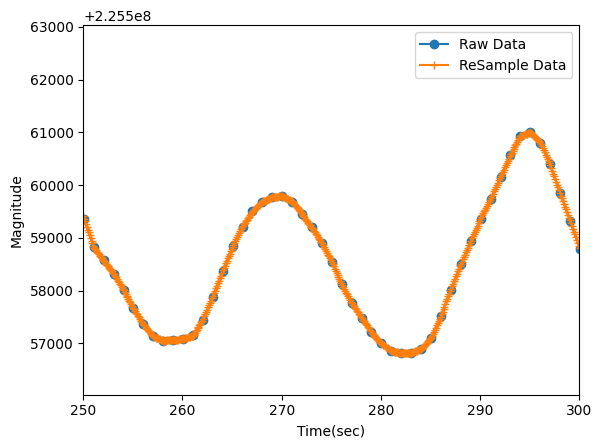

,alt,t_gps_sec,lat,c1_roll,t_c_sec,c3_throttle,c2_pitch
0,5511.000000,0.000000,2.255586e+08,1497.000000,0.000000,1000.000000,1513.000000
1,5642.231248,0.098019,2.255586e+08,1497.000000,0.098000,1000.000000,1506.959465
2,5753.095417,0.196038,2.255586e+08,1497.000000,0.196000,1000.000000,1505.012218
3,5790.420734,0.294057,2.255586e+08,1495.224746,0.294000,1000.000000,1503.224746
4,5827.746050,0.392076,2.255586e+08,1494.143854,0.392000,1000.000000,1500.431561
...,...,...,...,...,...,...,...
4995,875.466505,489.605339,2.255593e+08,1500.312824,489.510188,1414.000000,1654.748829
4996,856.173204,489.703358,2.255593e+08,1419.849800,489.608188,1414.000000,1610.494270
4997,836.879903,489.801377,2.255593e+08,1470.394502,489.706188,1414.000000,1594.700009
4998,817.586602,489.899396,2.255592e+08,1442.850176,489.804188,1414.000000,1670.692379


In [ ]:
#Resampling the Data
def resample(tparam,yparam):
  #tparam=str('t_gps_sec')
  #yparam=str('lat')
  x = df[tparam]  ###Change karo
  y =df[yparam]


  flinear = interpolate.interp1d(x, y)
  fcubic = interpolate.interp1d(x, y, kind='cubic')
  last_val=df.loc[x.last_valid_index(),tparam]
  print(last_val)

  xnew = np.arange(0, last_val, last_val/5000)  # time series data
  ylinear = flinear(xnew)
  #ylinear = fcubic(xnew)

  print(x.count(),len(xnew),len(ylinear))

  plt.plot(x, y, '-o',label='Raw Data')
  plt.xlim(250,300)
  plt.ylabel('Signal(PWM)')
  plt.xlabel('time(sec)')
  #plt.show()
  plt.plot(xnew, ylinear, '-+', label='ReSample Data')
  plt.xlim(250,300)
  plt.ylabel('Magnitude')
  plt.xlabel('Time(sec)')
  plt.legend()
  plt.show()

  df_sam[yparam]=ylinear  # changeKaro
  df_sam[tparam]=xnew

#change with every param and it will stored in df_sam
resample('t_gps_sec','lat')  # only change here , the parameters and run
df_sam


# Data save ./Resample

In [ ]:
#run once for saving the Resampled data
#.........careful.......#

#df_sam.to_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/Bird3Resample')

After Resample Data

In [ ]:

df_rs=pd.read_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/Bird3Resample')
df_rs



,Unnamed: 0,c1_roll,t_c_sec,c2_pitch,c3_throttle,lat,t_gps_sec,lon,alt,q_0,t_q_sec,q_1,q_2,q_3,xyz_0,t_xyz_sec,xyz_1,xyz_2
0,0,1497.000000,0.000000,1513.000000,1000.000000,2.255586e+08,0.000000,8.830386e+08,5511.000000,0.491494,0.000000,0.009503,-0.008243,0.870790,0.042057,0.000000,0.128891,-0.056796
1,1,1497.000000,0.098000,1506.959465,1000.000000,2.255586e+08,0.098019,8.830386e+08,5642.231248,0.492440,0.098000,0.005196,-0.005008,0.870317,0.009651,0.098001,0.078046,-0.012212
2,2,1497.000000,0.196000,1505.012218,1000.000000,2.255586e+08,0.196038,8.830387e+08,5753.095417,0.491926,0.196000,0.002853,-0.004021,0.870623,-0.015821,0.196001,0.026776,0.026341
3,3,1495.224746,0.294000,1503.224746,1000.000000,2.255586e+08,0.294057,8.830387e+08,5790.420734,0.489417,0.294000,0.001422,-0.004353,0.872038,-0.028378,0.294002,0.036210,0.078777
4,4,1494.143854,0.392000,1500.431561,1000.000000,2.255586e+08,0.392076,8.830387e+08,5827.746050,0.486601,0.392000,-0.000725,-0.004166,0.873614,-0.008179,0.392002,0.042752,0.036098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,1500.312824,489.510188,1654.748829,1414.000000,2.255593e+08,489.605339,8.830411e+08,875.466505,0.324901,489.510183,0.039557,0.196696,-0.924216,-0.273499,489.512670,0.552010,0.027880
4996,4996,1419.849800,489.608188,1610.494270,1414.000000,2.255593e+08,489.703358,8.830411e+08,856.173204,0.317447,489.608183,0.045385,0.184738,-0.928876,1.169610,489.610671,0.417848,-0.397672
4997,4997,1470.394502,489.706188,1594.700009,1414.000000,2.255593e+08,489.801377,8.830411e+08,836.879903,0.295580,489.706183,0.048625,0.135928,-0.944218,0.487584,489.708671,-2.175689,-0.471142
4998,4998,1442.850176,489.804188,1670.692379,1414.000000,2.255592e+08,489.899396,8.830410e+08,817.586602,0.299317,489.804183,0.000807,0.112600,-0.947482,0.047117,489.806672,0.033823,0.127689


# Quaternion to Euler Conv

In [ ]:
roll=[]
pitch=[]
yaw=[]
def quaternion_to_euler_angle_vectorized1(w, x, y, z):
    ysqr = y * y

    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + ysqr)
    X = np.degrees(np.arctan2(t0, t1))

    t2 = +2.0 * (w * y - z * x)
    t2 = np.where(t2>+1.0,+1.0,t2)
    #t2 = +1.0 if t2 > +1.0 else t2

    t2 = np.where(t2<-1.0, -1.0, t2)
    #t2 = -1.0 if t2 < -1.0 else t2
    Y = np.degrees(np.arcsin(t2))

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (ysqr + z * z)
    Z = np.degrees(np.arctan2(t3, t4))
    # Create a new row with values
    #new_row = pd.Series({'roll': X, 'pitch': Y, 'yaw': Z})

    return [X,Y,Z]

for index in range(0,len(df_rs['t_q_sec'])):

  w = df_rs.loc[index, 'q_0']  # Replace 'index' with the desired row index
  x = df_rs.loc[index, 'q_1']
  y = df_rs.loc[index, 'q_2']
  z = df_rs.loc[index, 'q_3']
  eulers=quaternion_to_euler_angle_vectorized1(w,x,y,z)
  #print(eulers)
  # new_row = pd.Series({'roll': eulers[0], 'pitch': eulers[1], 'yaw': eulers[2]})
  # df = df.append(new_row, ignore_index=True)
  roll.append(eulers[0])
  pitch.append(eulers[1])
  yaw.append(eulers[2])





 #Stored In Roll, Pitch , Yaw variables in df_rs

In [ ]:
#df_rs = pd.DataFrame({'roll':roll, 'pitch':pitch,'yaw':yaw})
df_rs['roll']=roll
df_rs['pitch']=pitch
df_rs['yaw']=yaw
df_rs

,Unnamed: 0,c1_roll,t_c_sec,c2_pitch,c3_throttle,lat,t_gps_sec,lon,alt,q_0,...,q_1,q_2,q_3,xyz_0,t_xyz_sec,xyz_1,xyz_2,roll,pitch,yaw
0,0,1497.000000,0.000000,1513.000000,1000.000000,2.255586e+08,0.000000,8.830386e+08,5511.000000,0.491494,...,0.009503,-0.008243,0.870790,0.042057,0.000000,0.128891,-0.056796,-0.287344,-1.412647,121.120800
1,1,1497.000000,0.098000,1506.959465,1000.000000,2.255586e+08,0.098019,8.830386e+08,5642.231248,0.492440,...,0.005196,-0.005008,0.870317,0.009651,0.098001,0.078046,-0.012212,-0.206314,-0.800830,120.997635
2,2,1497.000000,0.196000,1505.012218,1000.000000,2.255586e+08,0.196038,8.830387e+08,5753.095417,0.491926,...,0.002853,-0.004021,0.870623,-0.015821,0.196001,0.026776,0.026341,-0.240298,-0.511325,121.065829
3,3,1495.224746,0.294000,1503.224746,1000.000000,2.255586e+08,0.294057,8.830387e+08,5790.420734,0.489417,...,0.001422,-0.004353,0.872038,-0.028378,0.294002,0.036210,0.078777,-0.355218,-0.386243,121.395933
4,4,1494.143854,0.392000,1500.431561,1000.000000,2.255586e+08,0.392076,8.830387e+08,5827.746050,0.486601,...,-0.000725,-0.004166,0.873614,-0.008179,0.392002,0.042752,0.036098,-0.457502,-0.159766,121.765258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,1500.312824,489.510188,1654.748829,1414.000000,2.255593e+08,489.605339,8.830411e+08,875.466505,0.324901,...,0.039557,0.196696,-0.924216,-0.273499,489.512670,0.552010,0.027880,-20.176264,11.591421,-143.331345
4996,4996,1419.849800,489.608188,1610.494270,1414.000000,2.255593e+08,489.703358,8.830411e+08,856.173204,0.317447,...,0.045385,0.184738,-0.928876,1.169610,489.610671,0.417848,-0.397672,-18.722112,11.630709,-144.180668
4997,4997,1470.394502,489.706188,1594.700009,1414.000000,2.255593e+08,489.801377,8.830411e+08,836.879903,0.295580,...,0.048625,0.135928,-0.944218,0.487584,489.708671,-2.175689,-0.471142,-13.379717,9.914643,-146.393924
4998,4998,1442.850176,489.804188,1670.692379,1414.000000,2.255592e+08,489.899396,8.830410e+08,817.586602,0.299317,...,0.000807,0.112600,-0.947482,0.047117,489.806672,0.033823,0.127689,-12.321530,3.952857,-145.363076


# GPS to XY Transformation

In [ ]:
df_rs['lon']=df_rs['lon']/10000000
df_rs['lat']=df_rs['lat']/10000000

In [ ]:
#df_rs.to_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/resampleBird3Data')  # run it for saving resultant value
#df_rs

In [ ]:
#df=pd.read_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/resampleBird3Data')

,Unnamed: 0.1,Unnamed: 0,c1_roll,t_c_sec,c2_pitch,c3_throttle,lat,t_gps_sec,lon,alt,...,q_1,q_2,q_3,xyz_0,t_xyz_sec,xyz_1,xyz_2,roll,pitch,yaw
0,0,0,1497.000000,0.000000,1513.000000,1000.000000,22.555865,0.000000,88.303865,5511.000000,...,0.009503,-0.008243,0.870790,0.042057,0.000000,0.128891,-0.056796,-0.287344,-1.412647,121.120800
1,1,1,1497.000000,0.098000,1506.959465,1000.000000,22.555865,0.098019,88.303865,5642.231248,...,0.005196,-0.005008,0.870317,0.009651,0.098001,0.078046,-0.012212,-0.206314,-0.800830,120.997635
2,2,2,1497.000000,0.196000,1505.012218,1000.000000,22.555864,0.196038,88.303865,5753.095417,...,0.002853,-0.004021,0.870623,-0.015821,0.196001,0.026776,0.026341,-0.240298,-0.511325,121.065829
3,3,3,1495.224746,0.294000,1503.224746,1000.000000,22.555864,0.294057,88.303866,5790.420734,...,0.001422,-0.004353,0.872038,-0.028378,0.294002,0.036210,0.078777,-0.355218,-0.386243,121.395933
4,4,4,1494.143854,0.392000,1500.431561,1000.000000,22.555864,0.392076,88.303866,5827.746050,...,-0.000725,-0.004166,0.873614,-0.008179,0.392002,0.042752,0.036098,-0.457502,-0.159766,121.765258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,4995,1500.312824,489.510188,1654.748829,1414.000000,22.555935,489.605339,88.304114,875.466505,...,0.039557,0.196696,-0.924216,-0.273499,489.512670,0.552010,0.027880,-20.176264,11.591421,-143.331345
4996,4996,4996,1419.849800,489.608188,1610.494270,1414.000000,22.555931,489.703358,88.304110,856.173204,...,0.045385,0.184738,-0.928876,1.169610,489.610671,0.417848,-0.397672,-18.722112,11.630709,-144.180668
4997,4997,4997,1470.394502,489.706188,1594.700009,1414.000000,22.555927,489.801377,88.304107,836.879903,...,0.048625,0.135928,-0.944218,0.487584,489.708671,-2.175689,-0.471142,-13.379717,9.914643,-146.393924
4998,4998,4998,1442.850176,489.804188,1670.692379,1414.000000,22.555923,489.899396,88.304104,817.586602,...,0.000807,0.112600,-0.947482,0.047117,489.806672,0.033823,0.127689,-12.321530,3.952857,-145.363076


In [ ]:

def gps2xy(longitude,latitude):
  # Example Coordinates (Adjust these to your actual data)
  #latitude = 28.6129  # Example: Delhi, India
  #longitude = 77.2304

  # Define the source and target coordinate systems
  wgs84 = pyproj.CRS('EPSG:4326')  # Standard GPS coordinates

  # Determine UTM zone for your location in India
  # India covers multiple UTM zones (40-47)
  # Use a reference source (e.g., https://epsg.io/) to find the zone
  # for your specific coordinates. Here, we'll assume zone 46 for Delhi.
  utm_zone = 46

  # Construct the UTM CRS for India zone
  utm_crs = pyproj.CRS(f'EPSG:326{utm_zone}')

  # Create a transformation object
  transformer = pyproj.Transformer.from_crs(wgs84, utm_crs, always_xy=True)

  # Perform the transformation
  x, y = transformer.transform(longitude, latitude)

  #print(f"Indian UTM Coordinates (Zone {utm_zone}): X = {x:.2f}, Y = {y:.2f}")
  return [x,y]

In [ ]:
xx=[]
yy=[]
for i in range(df.shape[0]):
  x=df_rs['lon'][i] #df>df_rs
  y=df_rs['lat'][i]
  gps2xy(x,y)
  xx.append(gps2xy(x,y)[0])
  yy.append(gps2xy(x,y)[1])

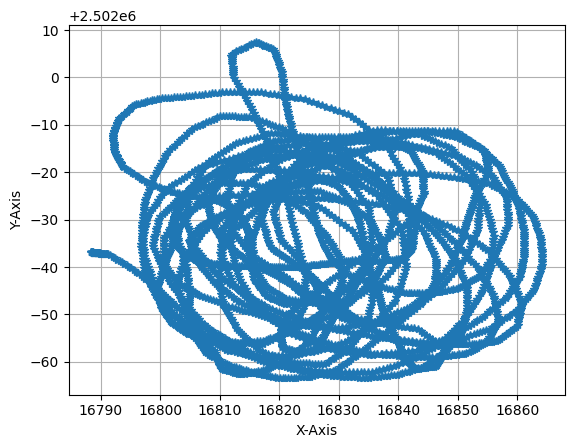

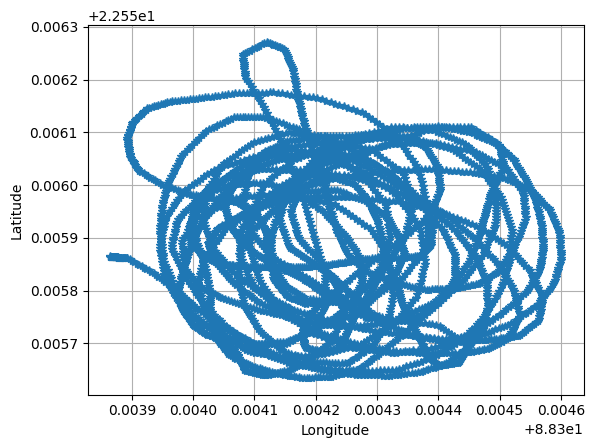

In [ ]:

plt.plot(xx,yy,'*-')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.grid()
plt.show()
plt.plot(df['lon'],df['lat'],'*-')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

Adding X-axis, Y-axis

In [ ]:
xx = xx[:df_rs.shape[0]]  #>_rs
yy = yy[:df_rs.shape[0]]
df_rs['x_axis'] = xx
df_rs['y_axis'] = yy
df_rs

,Unnamed: 0,c1_roll,t_c_sec,c2_pitch,c3_throttle,lat,t_gps_sec,lon,alt,q_0,...,q_3,xyz_0,t_xyz_sec,xyz_1,xyz_2,roll,pitch,yaw,x_axis,y_axis
0,0,1497.000000,0.000000,1513.000000,1000.000000,22.555865,0.000000,88.303865,5511.000000,0.491494,...,0.870790,0.042057,0.000000,0.128891,-0.056796,-0.287344,-1.412647,121.120800,16788.333248,2.501963e+06
1,1,1497.000000,0.098000,1506.959465,1000.000000,22.555865,0.098019,88.303865,5642.231248,0.492440,...,0.870317,0.009651,0.098001,0.078046,-0.012212,-0.206314,-0.800830,120.997635,16788.366358,2.501963e+06
2,2,1497.000000,0.196000,1505.012218,1000.000000,22.555864,0.196038,88.303865,5753.095417,0.491926,...,0.870623,-0.015821,0.196001,0.026776,0.026341,-0.240298,-0.511325,121.065829,16788.398502,2.501963e+06
3,3,1495.224746,0.294000,1503.224746,1000.000000,22.555864,0.294057,88.303866,5790.420734,0.489417,...,0.872038,-0.028378,0.294002,0.036210,0.078777,-0.355218,-0.386243,121.395933,16788.427159,2.501963e+06
4,4,1494.143854,0.392000,1500.431561,1000.000000,22.555864,0.392076,88.303866,5827.746050,0.486601,...,0.873614,-0.008179,0.392002,0.042752,0.036098,-0.457502,-0.159766,121.765258,16788.455817,2.501963e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,1500.312824,489.510188,1654.748829,1414.000000,22.555935,489.605339,88.304114,875.466505,0.324901,...,-0.924216,-0.273499,489.512670,0.552010,0.027880,-20.176264,11.591421,-143.331345,16814.266621,2.501970e+06
4996,4996,1419.849800,489.608188,1610.494270,1414.000000,22.555931,489.703358,88.304110,856.173204,0.317447,...,-0.928876,1.169610,489.610671,0.417848,-0.397672,-18.722112,11.630709,-144.180668,16813.903679,2.501970e+06
4997,4997,1470.394502,489.706188,1594.700009,1414.000000,22.555927,489.801377,88.304107,836.879903,0.295580,...,-0.944218,0.487584,489.708671,-2.175689,-0.471142,-13.379717,9.914643,-146.393924,16813.540737,2.501969e+06
4998,4998,1442.850176,489.804188,1670.692379,1414.000000,22.555923,489.899396,88.304104,817.586602,0.299317,...,-0.947482,0.047117,489.806672,0.033823,0.127689,-12.321530,3.952857,-145.363076,16813.177795,2.501969e+06


In [ ]:
df_rs['x_axis'] = df_rs['x_axis']-df_rs['x_axis'][0]  #offset X
df_rs['y_axis'] = df_rs['y_axis']-df_rs['y_axis'][0]  #offset Y
columns_to_average = ['t_xyz_sec', 't_c_sec', 't_q_sec','t_gps_sec'] #Time Avg
df_rs['time'] = df[columns_to_average].mean(axis=1)

In [ ]:
df_rs

# Data save./Filter

```
# This is formatted as code
```



In [ ]:
#SAVE ALL THE DATA

df_rs.drop(columns=['Unnamed: 0','t_gps_sec','t_c_sec','t_xyz_sec','t_q_sec'])
#df_rs.to_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/Bird3ResampleFilter')

# Data Normalization

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/Bird3ResampleFilter')

In [ ]:
Roll_max=df['roll'].max()
Roll_min=df['roll'].min()
Pitch_min=df['pitch'].min()
Pitch_max=df['pitch'].max()
Yaw_min=df['yaw'].min()
Yaw_max=df['yaw'].max()
C_min=900
C_max=2100

Min-Max Normalization

In [ ]:
df['roll']=(df['roll']-Roll_min)/(Roll_max-Roll_min)
df['pitch']=(df['pitch']-Pitch_min)/(Pitch_max-Pitch_min)
df['yaw']=(df['yaw']-Yaw_min)/(Yaw_max-Yaw_min)
df['c1_roll']=(df['c1_roll']-C_min)/(C_max-C_min)
df['c2_pitch']=(df['c2_pitch']-C_min)/(C_max-C_min)
df['c3_throttle']=(df['c3_throttle']-C_min)/(C_max-C_min)

df['x_norm']=(df['x_axis']-df['x_axis'].min())/(df['x_axis'].max()-df['x_axis'].min())
df['y_norm']=(df['y_axis']-df['y_axis'].min())/(df['y_axis'].max()-df['y_axis'].min())
df['alt_norm']=(df['alt']-df['alt'].min())/(df['alt'].max()-df['alt'].min())

df['time_diff']=df['time'].shift(-1)-df['time']
df['time_diff_norm']=(df['time_diff']-df['time_diff'].min())/(df['time_diff'].max()-df['time_diff'].min())

# Data save ./_norm

In [ ]:
df.dropna()

In [ ]:

#df.to_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/Bird3ResampleFilter_norm')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/Bird3ResampleFilter_norm')
df


# Testing

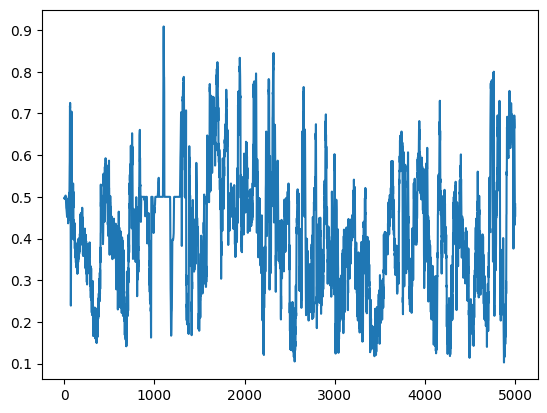

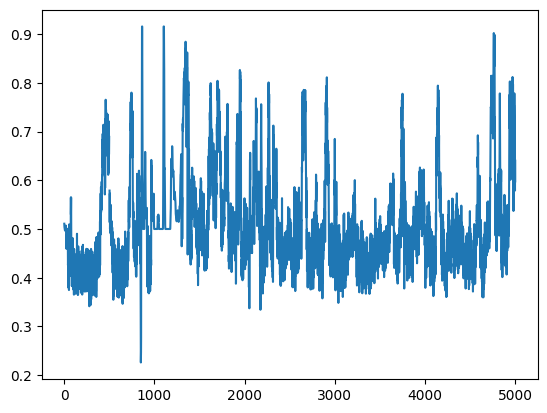

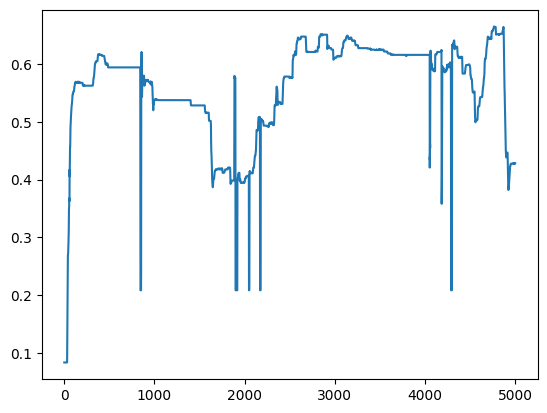

In [ ]:
plt.plot(df['c1_roll'])
plt.show()
plt.plot(df['c2_pitch'])
plt.show()
plt.plot(df['c3_throttle'])